 # <h1 style='background:#fff; border:5; color:black'><center>Machine Learning Classification Project <br> For The Diabeties analysis</center></h1>
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:; border:0; color:black'><center>INDEX</center></h1>

[1. ENVIRONMENT SETUP](#1)   
    
[2. EXPLORATORY DATA ANALYSIS](#2)  
    

    

# **2.Environment Setup**
<a id="2"></a>

**1.Importing Libraries**

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#### **2. Loading the Dataset**

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **3. Inspecting the Dataset**

In [5]:
# Checking the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (768, 9)


In [6]:
# Displaying basic info about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:

# Checking for missing values
data.isnull().sum()/data.shape[0]*100


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
# Getting summary statistics of numerical columns
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Separating numerical and categorical columns

numerical_cols = []
cat_col = []

for col in data.columns:
    if (data[col].nunique()<5) or col=='zodiac_sign':
        cat_col.append(col)
    else:
        numerical_cols.append(col)
        
print('Numerical columns: ', numerical_cols)
print('Categorical columns: ', cat_col)

Numerical columns:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical columns:  ['Outcome']


# **2.Exploratory Data Analysis (EDA)**
<a id="2"></a>

1.  Univariate Analysis: Histograms, boxplots for numerical features.
2.  Bivariate Analysis: correlation heatmap
3.  Categorical Feature Analysis:

**1-Univariate Analysis: Histograms, boxplots for numerical features.**

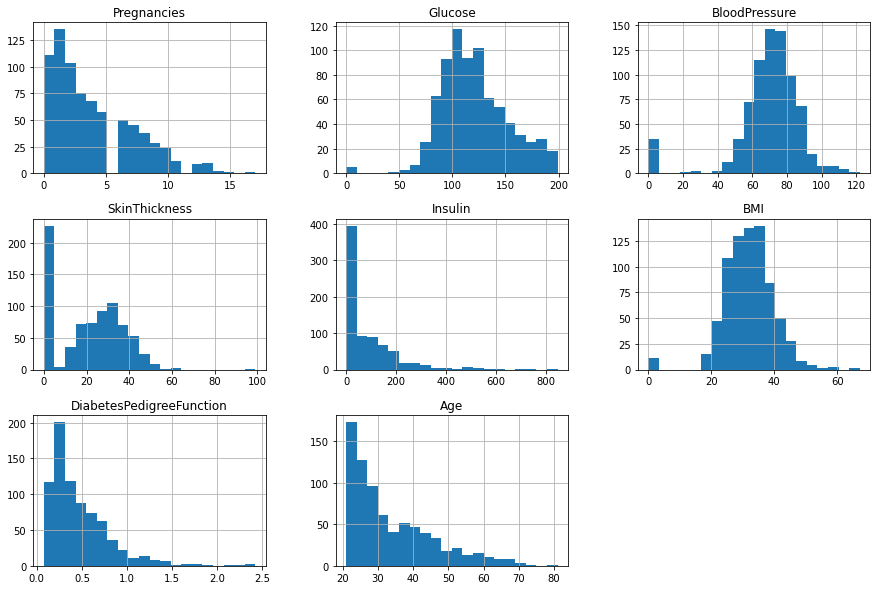

In [12]:
# Histogram for numerical columns
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()



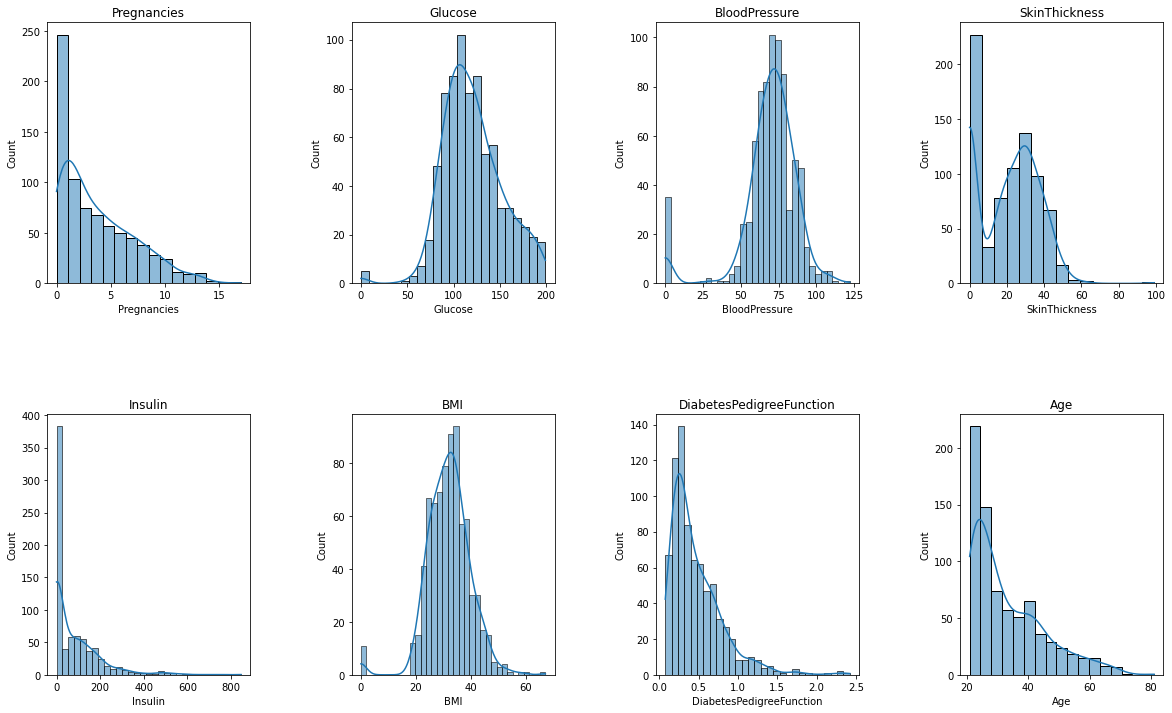

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20,12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(numerical_cols):
    row, col_num = divmod(i, 4)
    sns.histplot(data=data, x=col, kde=True, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

plt.show()

#### **Boxplot for outliers detection**

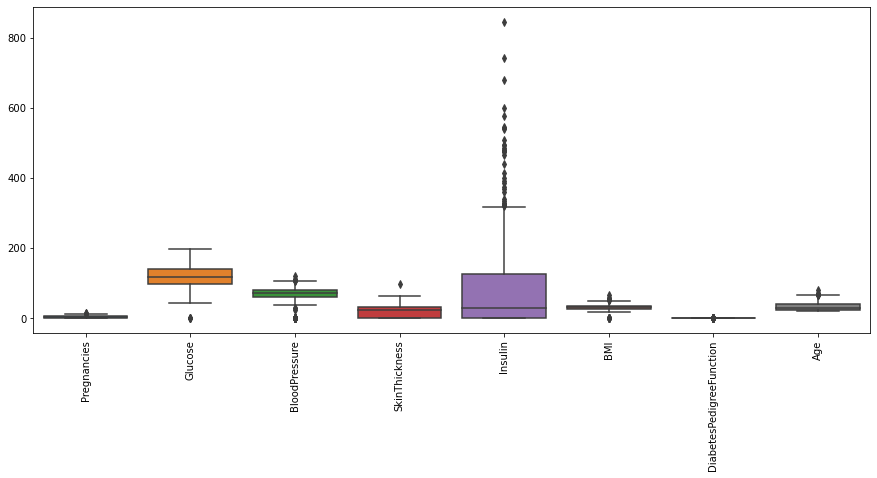

In [19]:
# Boxplot for detecting outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=90)
plt.show()

**2-Categorical Feature Analysis:Count plot**

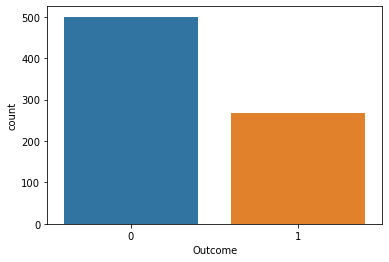

In [22]:
# Countplot for the target column
sns.countplot(x='Outcome', data=data)
plt.show()


 **3-Bivariate Analysis: correlation heatmap**

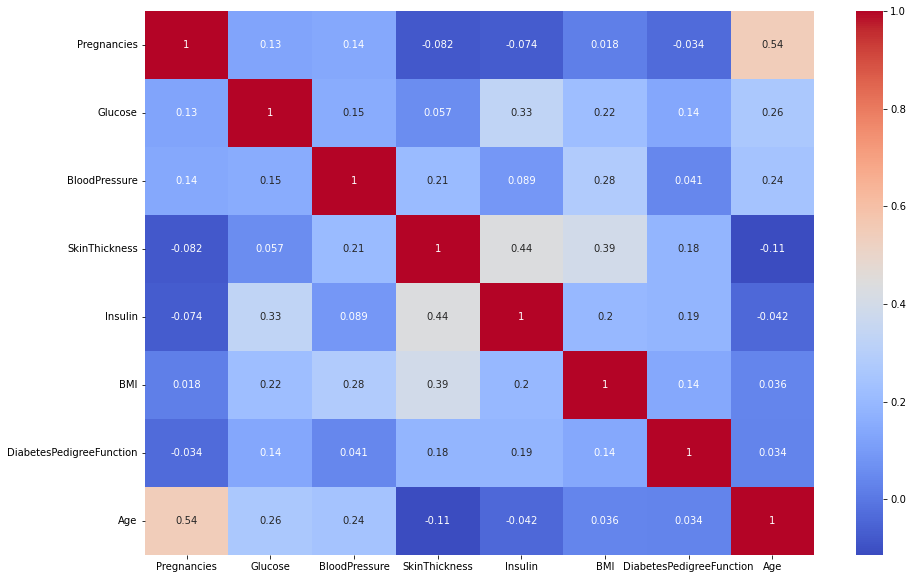

In [23]:
# Calculating the correlation matrix for numerical columns
correlation_matrix = data[numerical_cols].corr()



plt.figure(figsize=(15,10))
sns.heatmap(data=data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()
